In [1]:
import numpy as np
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
%matplotlib inline

In [11]:
nx = 81
nt = 160
dx = 4.0/(nx-1)
x = np.linspace(0,4,nx)
rho_in = np.linspace(0,5,nx)
rho_max = 10.
u_max = 1.

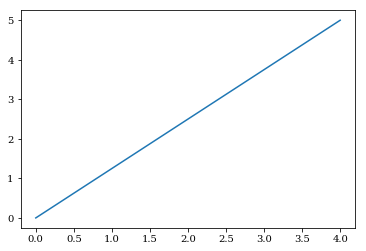

In [12]:
pyplot.plot(x,rho_in)

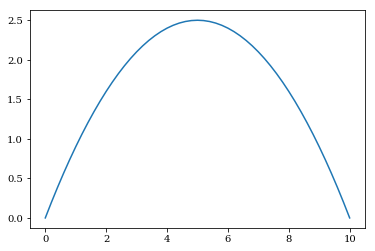

In [13]:
def computeF(u_max,rho_max,rho):
    return u_max*rho*(1-rho/rho_max)
rho_range = np.linspace(0,rho_max,51)
pyplot.plot(rho_range,computeF(1,10,rho_range))

In [14]:
def ftbs(rho,nt,dt,dx,rho_max,u_max):
    rho_n = np.zeros((nt,len(rho)))
    rho_n[0,:] = rho.copy()
    
    for t in range(1,nt):
        F = computeF(u_max,rho_max,rho)
        rho_n[t,1:] = rho[1:] - dt/dx*(F[1:]-F[:-1])
        rho_n[t,0] = rho[0]
        rho = rho_n[t].copy()
    return rho_n        

In [15]:
sigma = 1.
dt=sigma*dx
rho_n = ftbs(rho_in,nt,dt,dx,rho_max,u_max)

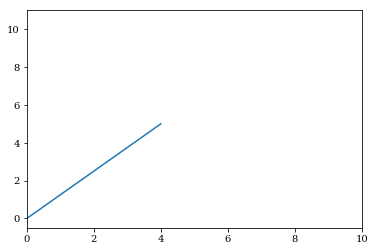

In [17]:
from matplotlib import animation
from IPython.display import HTML
fig = pyplot.figure()
ax = pyplot.axes(xlim=(0,10),ylim=(-0.5,11))
line, = ax.plot([],[])
def animate(data):
    line.set_data(x,data)
    return line,
anim = animation.FuncAnimation(fig,animate,frames=rho_n,interval=50)
HTML(anim.to_html5_video())